# Geocoding with geopandas

## goals of the tutorial
- from string to lat/long
- from lat/lon to string


### requirements
- python knowledge
- pandas

### status 
*"I'm a geo-soothsayer"*

---

In [2]:
import geopandas as gpd


<div class="alert alert-info" style="font-size:120%">
<b>GEOCODING service</b>
<img src="https://geopy.readthedocs.io/en/stable/_images/logo-wide.png">
the geopandas module is based on geopy
<ul>
    <li>all the goecoders service are available here: <a href="https://geopy.readthedocs.io/en/stable/#module-geopy.geocoders">https://geopy.readthedocs.io/en/stable/#module-geopy.geocoders</a></li>
</ul>

## choose the right service
![](img/getlonlat.png)

# geocoding

In [6]:
cols = ['city']
names = [('Roma'),('Palermo'),('Trento'),('Genova'),('Bari'),('Trieste'),('Napoli'),('Cagliari'),('Messina'),('Lecce')]
cities = gpd.GeoDataFrame(names,columns=cols)

In [10]:
geo_cities = gpd.tools.geocode(cities.city, provider="arcgis")
%time

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs


In [11]:
geo_cities

,geometry,address
0,POINT (12.49565000000007 41.90322000000003),Roma
1,POINT (13.36112000000003 38.12207000000006),Palermo
2,POINT (11.11926000000005 46.07005000000004),Trento
3,POINT (8.938980000000072 44.41039000000006),Genova
4,POINT (16.86666000000002 41.12587000000008),Bari
5,POINT (13.77269000000007 45.65757000000008),Trieste
6,POINT (14.25226000000004 40.84014000000008),Napoli
7,POINT (9.110490000000027 39.21454000000006),Cagliari
8,POINT (15.55308000000002 38.17837000000003),Messina
9,POINT (18.16802000000007 40.35796000000005),Lecce


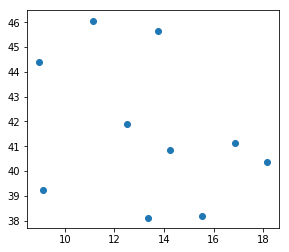

In [12]:
geo_cities.plot()

# reverse geocoding

In [27]:
from geopy.geocoders import Nominatim

In [28]:
point = geo_cities.geometry[8]

In [29]:
latlon = str(point.y) + "," + str(point.x)

In [30]:
geolocator = Nominatim(user_agent="bigdive")

In [31]:
location = geolocator.reverse(latlon)

In [32]:
location


Location(Via La Farina, IV Circoscrizione, Messina, ME, SIC, 98123, Italia, (38.1783837842552, 15.5530648653528, 0.0))